## HW4 by Denis Osipychev
# Tabular Policy Gradient
### Policy Gradient - REINFORCE

In [1]:
# import env and modules
import gym
import numpy as np
import myenv

In [2]:
# create an instance of env
env = myenv.GridWorldEnv()

In [3]:
# initialize hyperparams for PG
n_episodes = 10000
episode_lenght = 20
gamma = 0.9
alpha = 0.001
update_freq = 100

In [4]:
# initialize random policy weights
def policy_init():
    #policy = np.zeros([env.observation_space.n, env.action_space.n])
    policy = np.random.rand(env.observation_space.n, env.action_space.n)-0.5
    #print('Policy:\n',policy)
    return policy

In [5]:
# function to discount reward in trajectory
def discount_rewards(r):
    discounted_reward = np.zeros_like(r)
    running_reward = 0
    for t in reversed(range(0,len(r))):
        running_reward = running_reward*gamma + r[t]
        discounted_reward[t] = running_reward
    return discounted_reward

In [6]:
# stable softmax (taken from https://deepnotes.io/softmax-crossentropy)
def softmax(x):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

In [7]:
# gradient function for softmax given single trajectory (based on lecture notes)
def gradient(policy, s_arr, a_arr, r_arr):
    n = len(r_arr)
    g = np.zeros_like(policy)
    for t in range(n):
        dp = np.eye(4)[a_arr[t]] - softmax(policy[s_arr[t]]) #one hot vector -minus policy for one state
        g[s_arr[t]] = g[s_arr[t]] + dp * r_arr[t] #accumulate gradients through trajectory
    return g

In [8]:
# PG REINFORCE algorithm
def PolicyGrad(policy):
    stats = []
    grad_buffer = np.zeros_like(policy)
            
    for i_episode in range(n_episodes):
        r_total = 0
        s = env.reset()[:]
        trajectory = []
            
        for t in range(episode_lenght):
        
            s_flat = s[0] * 5 + s[1] #flatter state from 2D to 1D to simplify policy matrix
            a_distr = softmax(policy[s_flat]) #get prob distr over actions
            a = np.random.choice(np.arange(4), p=a_distr) #draw an action w.r. to prob distr
            s_prime, r, d, _ = env.step(a)

            trajectory.append([s_flat,a,r])
                
            s = s_prime[:]
            r_total += r
                
            if d:
                break
                     
        # update gradient buffer with new trajectory
        s_arr, a_arr, r_arr = zip(*trajectory)
        r_arr = discount_rewards(r_arr)
        grad = gradient(policy, s_arr, a_arr, r_arr)
        grad_buffer = grad_buffer + grad #accumulate gradients b/w updates
        
        if i_episode % update_freq == 0 and i_episode!=0:
            policy = policy + alpha*grad_buffer
            grad_buffer = np.zeros_like(policy)
            #print('Policy updated')
        
        # Update statistics
        stats.append([i_episode,r_total])
        
        if i_episode % 100 == 0:
            print(' Epoch:',i_episode,',Average R:',np.mean(np.asarray(stats)[-100:,1]))
    
    return policy,stats

In [9]:
# print a policy (taken from Dr. West solution and adapted)
def print_policy(policy_matrix):
    output = ''
    k = 0
    for i in range(5):
        for j in range(5):
            if len(policy_matrix.shape) == 2:
                s = i*5 + j
                a = policy_matrix[s,:].argmax()
            else:
                a = policy_matrix[i,j,:].argmax()
            c = [u"⇧",u"⇩",u"⇦",u"⇨"][a]
            output += c
            k += 1
        output += '\n'
    return output

In [10]:
# run the algorithm to get statistics (simple env)
env.stochastic_transitions = False
policy = policy_init()
policy, statsPGa = PolicyGrad(policy)

 Epoch: 0 ,Average R: 6.0
 Epoch: 100 ,Average R: 1.77
 Epoch: 200 ,Average R: 1.23
 Epoch: 300 ,Average R: 2.58
 Epoch: 400 ,Average R: 3.45
 Epoch: 500 ,Average R: 4.17
 Epoch: 600 ,Average R: 3.26
 Epoch: 700 ,Average R: 4.74
 Epoch: 800 ,Average R: 4.03
 Epoch: 900 ,Average R: 4.59
 Epoch: 1000 ,Average R: 5.88
 Epoch: 1100 ,Average R: 6.37
 Epoch: 1200 ,Average R: 7.78
 Epoch: 1300 ,Average R: 7.87
 Epoch: 1400 ,Average R: 7.64
 Epoch: 1500 ,Average R: 9.37
 Epoch: 1600 ,Average R: 12.02
 Epoch: 1700 ,Average R: 11.87
 Epoch: 1800 ,Average R: 12.2
 Epoch: 1900 ,Average R: 14.68
 Epoch: 2000 ,Average R: 16.31
 Epoch: 2100 ,Average R: 17.83
 Epoch: 2200 ,Average R: 19.66
 Epoch: 2300 ,Average R: 19.24
 Epoch: 2400 ,Average R: 23.18
 Epoch: 2500 ,Average R: 22.26
 Epoch: 2600 ,Average R: 23.44
 Epoch: 2700 ,Average R: 24.9
 Epoch: 2800 ,Average R: 24.69
 Epoch: 2900 ,Average R: 25.69
 Epoch: 3000 ,Average R: 27.03
 Epoch: 3100 ,Average R: 26.11
 Epoch: 3200 ,Average R: 26.96
 Epoch: 

In [11]:
print("Policy (simple case):")
print(print_policy(policy))

Policy (simple case):
⇦⇧⇦⇦⇦
⇩⇧⇧⇧⇧
⇨⇨⇨⇨⇧
⇨⇧⇨⇨⇨
⇨⇨⇨⇨⇨



In [12]:
# run the algorithm to get statistics (complex env)
env.stochastic_transitions = True
policy = policy_init()
policy, statsPGb = PolicyGrad(policy)

 Epoch: 0 ,Average R: -5.0
 Epoch: 100 ,Average R: 0.73
 Epoch: 200 ,Average R: 0.1
 Epoch: 300 ,Average R: 0.27
 Epoch: 400 ,Average R: 1.11
 Epoch: 500 ,Average R: 2.52
 Epoch: 600 ,Average R: 1.83
 Epoch: 700 ,Average R: 1.33
 Epoch: 800 ,Average R: 2.29
 Epoch: 900 ,Average R: 2.04
 Epoch: 1000 ,Average R: 3.83
 Epoch: 1100 ,Average R: 3.69
 Epoch: 1200 ,Average R: 4.66
 Epoch: 1300 ,Average R: 6.11
 Epoch: 1400 ,Average R: 6.0
 Epoch: 1500 ,Average R: 7.19
 Epoch: 1600 ,Average R: 7.73
 Epoch: 1700 ,Average R: 8.34
 Epoch: 1800 ,Average R: 9.04
 Epoch: 1900 ,Average R: 10.46
 Epoch: 2000 ,Average R: 10.24
 Epoch: 2100 ,Average R: 11.1
 Epoch: 2200 ,Average R: 12.21
 Epoch: 2300 ,Average R: 12.41
 Epoch: 2400 ,Average R: 13.6
 Epoch: 2500 ,Average R: 13.96
 Epoch: 2600 ,Average R: 14.67
 Epoch: 2700 ,Average R: 15.99
 Epoch: 2800 ,Average R: 16.11
 Epoch: 2900 ,Average R: 17.52
 Epoch: 3000 ,Average R: 16.77
 Epoch: 3100 ,Average R: 18.88
 Epoch: 3200 ,Average R: 19.21
 Epoch: 3300

In [13]:
print("Policy (simple case):")
print(print_policy(policy))

Policy (simple case):
⇦⇦⇧⇦⇧
⇩⇧⇧⇧⇧
⇨⇨⇧⇧⇧
⇨⇧⇧⇧⇧
⇨⇨⇨⇧⇧



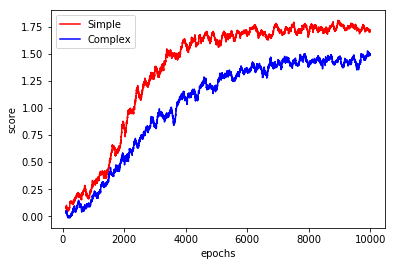

In [25]:
#plot the results (taken from https://gist.github.com/vksah32/8ba7ee7489bd8ec50c995f6216adcb7d)
import pandas as pd
import matplotlib.pyplot as plt 

mean_x1 = pd.Series(np.asarray(statsPGa)[:,1]).rolling(window=100).mean()/episode_lenght
mean_x2 = pd.Series(np.asarray(statsPGb)[:,1]).rolling(window=100).mean()/episode_lenght
itr = range(n_episodes)

plt.xlabel("epochs")
plt.ylabel("score")
plt.plot(itr, mean_x1, 'r-')
plt.plot(itr, mean_x2, 'b-')
plt.legend(['Simple','Complex'])
plt.show()

# Tabular Q-learning and SARSA

In [15]:
# initialize hyper parameters
epsilon = 0.1

In [16]:
# epsilon greedy policy
def greedy_policy(Q, state):
    if np.random.uniform() < epsilon:
#         best_action = int(np.random.uniform() * 4 // 1)
        best_action = np.random.randint(4)
    else:
        best_action = np.argmax(Q[state[0]][state[1]])
    return best_action

In [17]:
#SARSA algorithm
def SARSA(Q):
    stats = []
    
    for i_episode in range(n_episodes):
        r_total = 0
        s = env.reset()[:]
        a = greedy_policy(Q, s)
    
        for t in range(episode_lenght):
        
            s_prime, r, d, _ = env.step(a)
            a_prime = greedy_policy(Q, s_prime)
        
            # Q Update
            q_target = r + gamma * Q[s_prime[0]][s_prime[1]][a_prime]
            q_delta = q_target - Q[s[0]][s[1]][a]
            Q[s[0]][s[1]][a] = Q[s[0]][s[1]][a] + alpha * q_delta
    
            if d:
                break
                
            a = a_prime
            s = s_prime[:]
            r_total += r
        
        # Update statistics
        stats.append([i_episode,r_total])
    return Q, stats

In [18]:
def Q_Learn(Q):
    stats = []

    for i_episode in range(n_episodes):

        r_total = 0
        s = env.reset()[:]
        a = greedy_policy(Q, s)
    
        for t in range(episode_lenght):
        
            a = greedy_policy(Q, s)
            s_prime, r, d, _ = env.step(a)
            
            # Q Update
            q_target = r + gamma * max(Q[s_prime[0]][s_prime[1]][:])
            q_delta = q_target - Q[s[0]][s[1]][a]
            Q[s[0]][s[1]][a] = Q[s[0]][s[1]][a] + alpha * q_delta
    
            if d:
                break
                
            s = s_prime[:]
            r_total += r
        
        # Update statistics
        stats.append([i_episode,r_total])
    
    return Q, stats

In [19]:
# run the algorithm to get statistics (simple env) 
env.stochastic_transitions = False
Q = np.zeros((5,5,4))
Q, statsSARSAa = SARSA(Q)

Q = np.zeros((5,5,4))
Q, statsQLa = Q_Learn(Q)

In [20]:
print("Policy (simple case):")
print(print_policy(Q))

Policy (simple case):
⇦⇧⇧⇧⇧
⇧⇧⇧⇧⇧
⇨⇦⇧⇧⇧
⇧⇧⇧⇧⇧
⇨⇨⇧⇧⇧



In [21]:
# run the algorithm to get statistics (complex env)
env.stochastic_transitions = True
Q = np.zeros((5,5,4))
Q, statsSARSAb = SARSA(Q)

Q = np.zeros((5,5,4))
Q, statsQLb = Q_Learn(Q)

In [22]:
print("Policy (complex case):")
print(print_policy(Q))

Policy (complex case):
⇦⇦⇦⇧⇧
⇧⇧⇧⇧⇧
⇦⇧⇧⇧⇦
⇧⇧⇧⇧⇧
⇨⇨⇨⇨⇧



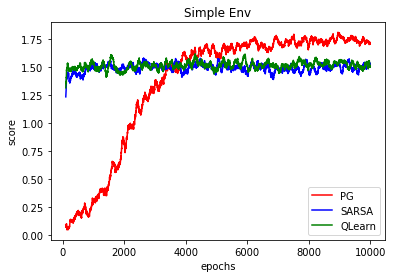

In [23]:
#plot the results (taken from https://gist.github.com/vksah32/8ba7ee7489bd8ec50c995f6216adcb7d)
import pandas as pd
import matplotlib.pyplot as plt 

mean_x1 = pd.Series(np.asarray(statsPGa)[:,1]).rolling(window=100).mean()/episode_lenght
mean_x2 = pd.Series(np.asarray(statsSARSAa)[:,1]).rolling(window=100).mean()/episode_lenght
mean_x3 = pd.Series(np.asarray(statsQLa)[:,1]).rolling(window=100).mean()/episode_lenght

itr = range(n_episodes)

plt.xlabel("epochs")
plt.ylabel("score")
plt.plot(itr, mean_x1, 'r-')
plt.plot(itr, mean_x2, 'b-')
plt.plot(itr, mean_x3, 'g-')
plt.legend(['PG','SARSA','QLearn'])
plt.title('Simple Env')
plt.show()

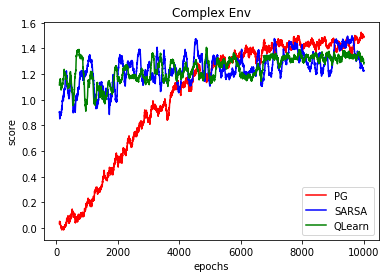

In [24]:
#plot the results (taken from https://gist.github.com/vksah32/8ba7ee7489bd8ec50c995f6216adcb7d)
import pandas as pd
import matplotlib.pyplot as plt 

mean_x1 = pd.Series(np.asarray(statsPGb)[:,1]).rolling(window=100).mean()/episode_lenght
mean_x2 = pd.Series(np.asarray(statsSARSAb)[:,1]).rolling(window=100).mean()/episode_lenght
mean_x3 = pd.Series(np.asarray(statsQLb)[:,1]).rolling(window=100).mean()/episode_lenght

itr = range(n_episodes)

plt.xlabel("epochs")
plt.ylabel("score")
plt.plot(itr, mean_x1, 'r-')
plt.plot(itr, mean_x2, 'b-')
plt.plot(itr, mean_x3, 'g-')
plt.legend(['PG','SARSA','QLearn'])
plt.title('Complex Env')
plt.show()